<a href="https://colab.research.google.com/github/mchardians/PCVK_Matrikulasi_2024/blob/main/Praktikum_1_Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transformasi Linier Brightness**

Formula: *g(x,y) = f(x,y)+b*

*g(x,y)* adalah nilai pixel setelah transformasi, *f(x,y)* adalah nilai pixel asli, *b* adalah nilai brightness

In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Mengubah Tingkat Kecerahan Citra
--------------------------------
Masukkan nilai kecerahan: 50


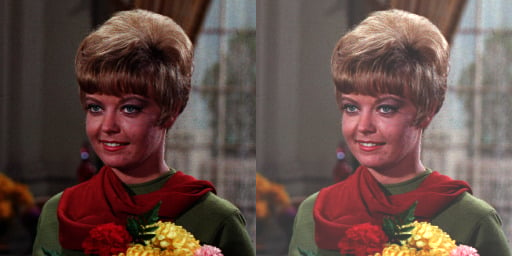

In [9]:
print("Mengubah Tingkat Kecerahan Citra")
print("--------------------------------")

try:
  brightness = int(input("Masukkan nilai kecerahan: "))
except ValueError:
  print("Error, not a number!")

original = cv.imread("Images/female.jpg")
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
 for x in range(original.shape[1]):
   for c in range(original.shape[2]):
     brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengimplementasikan Inverse Citra
---------------------------------


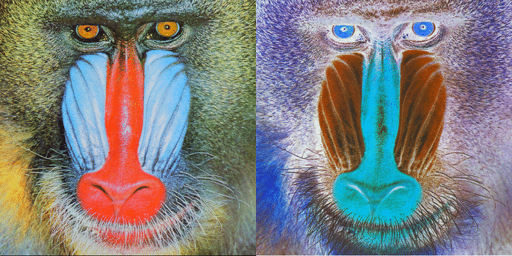

In [10]:
print("Mengimplementasikan Inverse Citra")
print("---------------------------------")

baboon = cv.imread("Images/baboon.png")
negative_image = np.zeros(baboon.shape, baboon.dtype)

for y in range(baboon.shape[0]):
  for x in range(baboon.shape[1]):
    for c in range(baboon.shape[2]):
      negative_image[y,x,c] = 255 - baboon[y,x,c]
final_frame = cv.hconcat((baboon, negative_image))
cv2_imshow(final_frame)

Mengubah Kontras dan Tingkat Kecerahan Citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan tingkat kontras [1.0 - 3.0]: 2


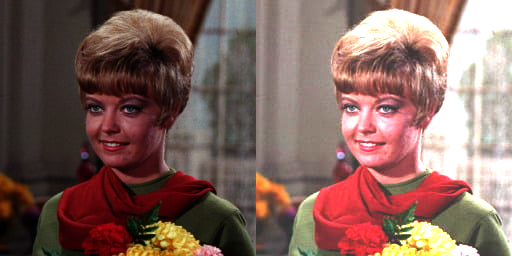

In [11]:
print("Mengubah Kontras dan Tingkat Kecerahan Citra")
print("--------------------------------------------")

try:
  brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
  contrast = float(input("Masukkan tingkat kontras [1.0 - 3.0]: "))
except ValueError:
  print("Error, not a number!")

transform_image = np.zeros(original.shape, original.dtype)

for y in range(baboon.shape[0]):
  for x in range(baboon.shape[1]):
    for c in range(baboon.shape[2]):
      transform_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)
final_frame = cv.hconcat((original, transform_image))
cv2_imshow(final_frame)

Mengimplementasikan Transformasi Logaritmik
-------------------------------------------
Masukkan nilai kecerahan: 50


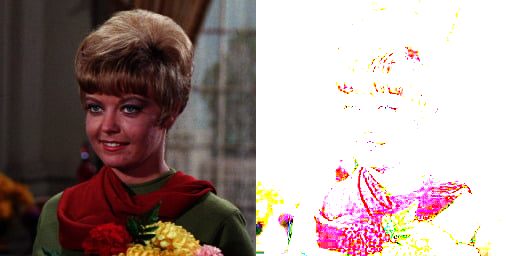

In [12]:
print("Mengimplementasikan Transformasi Logaritmik")
print("-------------------------------------------")

try:
  brightness = float(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, input harus berupa angka')

transform_image = np.zeros(original.shape, original.dtype)

normalized_image = original / 255.0

c = brightness

log_image = c * np.log1p(normalized_image)

log_image = np.uint8(np.clip(log_image * 255, 0, 255))

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

Mengimplementasikan Transformasi Grayscale
-------------------------------------------


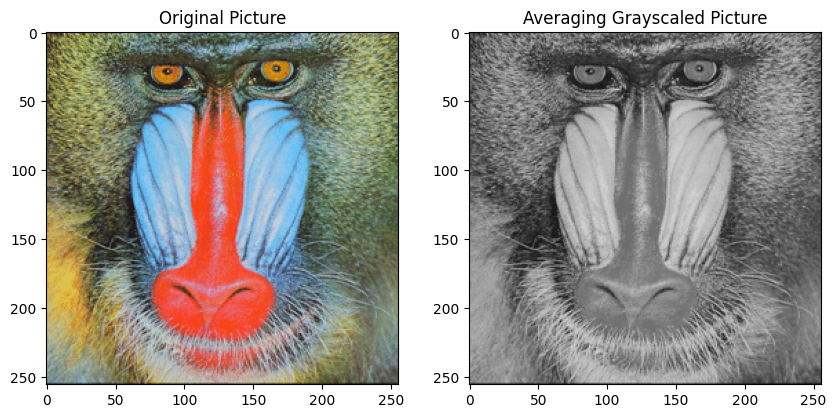

In [13]:
print("Mengimplementasikan Transformasi Grayscale")
print("-------------------------------------------")

grayscale_image = np.zeros((baboon.shape[0], baboon.shape[1]), dtype=np.uint8)

for y in range(baboon.shape[0]):
  for x in range(baboon.shape[1]):
    grayscale_image[y, x] = np.mean(baboon[y, x])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv.cvtColor(baboon, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Picture')

axes[1].imshow(cv.cvtColor(grayscale_image, cv.COLOR_GRAY2BGR))
axes[1].set_title('Averaging Grayscaled Picture')

plt.show()


<ipython-input-14-9821e705a28b>:10: RuntimeWarning: overflow encountered in scalar add
  grayscale_image[y, x] = (max_rgb + min_rgb) // 2


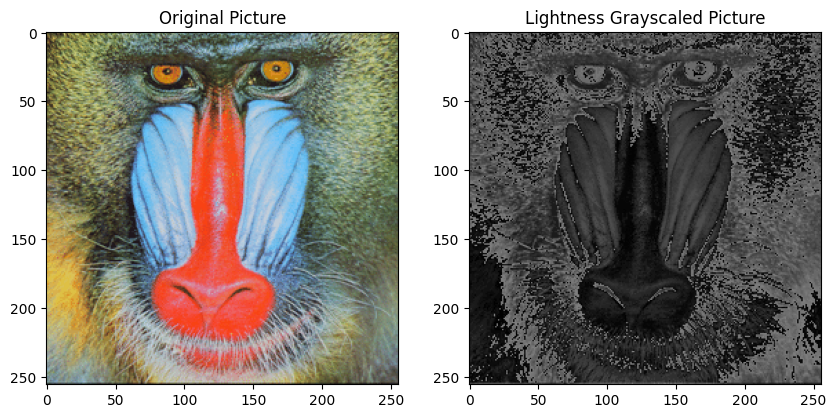

In [14]:
for y in range(baboon.shape[0]):
    for x in range(baboon.shape[1]):
        R = baboon[y, x, 2]
        G = baboon[y, x, 1]
        B = baboon[y, x, 0]


        max_rgb = max(R, G, B)
        min_rgb = min(R, G, B)
        grayscale_image[y, x] = (max_rgb + min_rgb) // 2

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv.cvtColor(baboon, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Picture')

axes[1].imshow(cv.cvtColor(grayscale_image, cv.COLOR_GRAY2BGR))
axes[1].set_title('Lightness Grayscaled Picture')

plt.show()

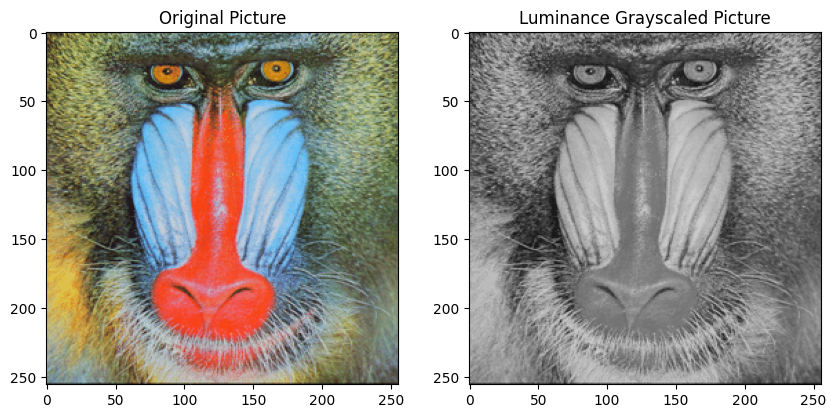

In [15]:
for y in range(baboon.shape[0]):
    for x in range(baboon.shape[1]):
        R = baboon[y, x, 2]
        G = baboon[y, x, 1]
        B = baboon[y, x, 0]

        grayscale_image[y, x] = int(0.299 * R + 0.587 * G + 0.114 * B)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv.cvtColor(baboon, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Picture')

axes[1].imshow(cv.cvtColor(grayscale_image, cv.COLOR_GRAY2BGR))
axes[1].set_title('Luminance Grayscaled Picture')

plt.show()


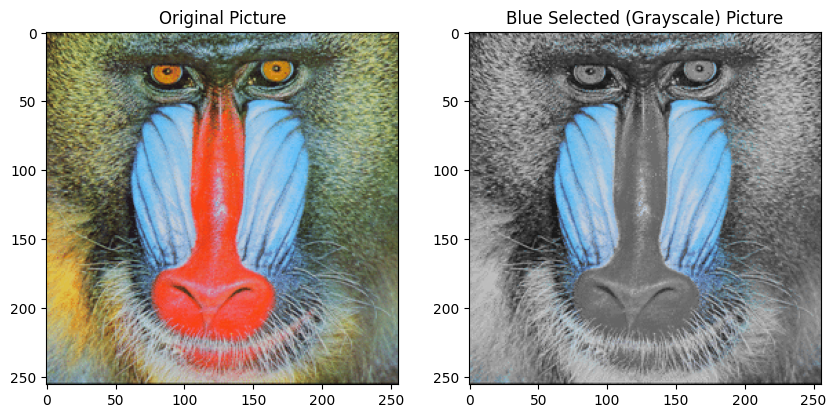

In [18]:
original = cv.imread('Images/baboon.png')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

def blue_highlight(image):
    gray = (0.21 * image[:,:,0] + 0.72 * image[:,:,1] + 0.07 * image[:,:,2]).astype(np.uint8)

    blue_mask = (image[:,:,2] > 100) & (image[:,:,2] > image[:,:,1]) & (image[:,:,2] > image[:,:,0])

    result = np.dstack([gray, gray, gray])
    result[blue_mask] = image[blue_mask]

    return result

blue_highlighted = blue_highlight(original)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original)
axes[0].set_title('Original Picture')

axes[1].imshow(blue_highlighted)
axes[1].set_title('Blue Selected (Grayscale) Picture')

plt.show()